<a href="https://colab.research.google.com/github/usamaamjadarain/fastai2.ipython/blob/main/fishes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [2]:
!pip install fastai -q --upgrade

     |████████████████████████████████| 194kB 18.6MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 12.8MB 240kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.


In [3]:
from fastai.vision.all import *
from fastai.metrics import error_rate, accuracy

In [4]:
path = Path('/content/gdrive/MyDrive/Usama_fish/train_validation_classes')

In [5]:
path.ls()

(#5) [Path('/content/gdrive/MyDrive/Usama_fish/train_validation_classes/Perca_fluviatilis'),Path('/content/gdrive/MyDrive/Usama_fish/train_validation_classes/Salvelinus_fontinalis'),Path('/content/gdrive/MyDrive/Usama_fish/train_validation_classes/Squalius_cephalus'),Path('/content/gdrive/MyDrive/Usama_fish/train_validation_classes/Coregonous_lavaretus'),Path('/content/gdrive/MyDrive/Usama_fish/train_validation_classes/Abramis_brama')]

In [96]:
 mask_datablock = DataBlock(
           get_items=get_image_files,
           get_y=parent_label,
           blocks=(ImageBlock, CategoryBlock), 
           item_tfms=RandomResizedCrop(256, min_scale=0.3),
           splitter=RandomSplitter(valid_pct=0.2, seed=42),
           batch_tfms=aug_transforms(mult=2))

In [97]:

dls = mask_datablock.dataloaders(path,bs=28)

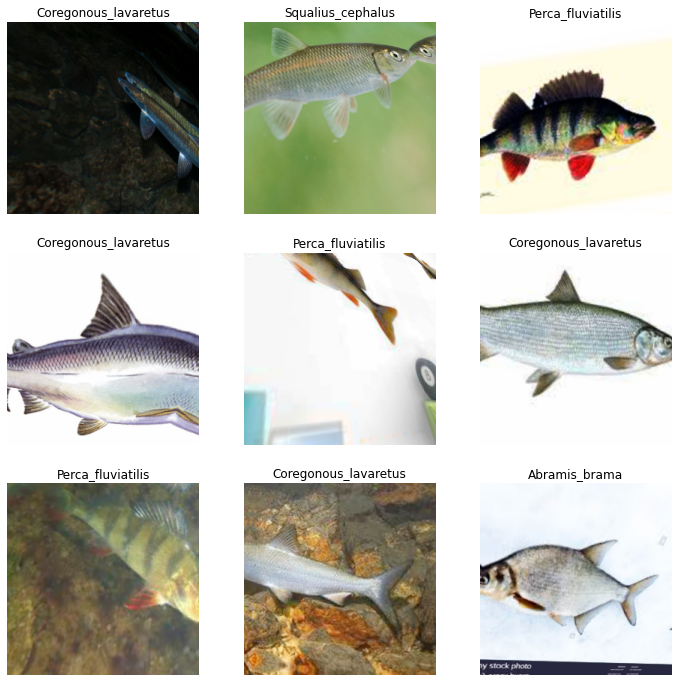

In [98]:
dls.show_batch(max_n=9 , figsize=(12,12))

In [99]:
learn = cnn_learner(dls, resnet50, metrics=[accuracy])

In [100]:
learn.summary()

Sequential (Input shape: 28)
Layer (type)         Output Shape         Param #    Trainable 
                     28 x 64 x 128 x 128 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    4096       False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
____________________________________________________________________________
                     28 x 256 x 64 x 64  
Conv2d                                    16384      False     
BatchNorm2d                               512        True      
ReLU                                                           
__________________________________________

SuggestedLRs(lr_min=0.0019054606556892395, lr_steep=2.511886486900039e-05)

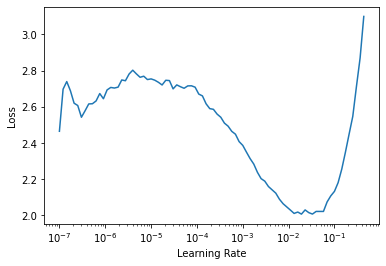

In [101]:

learn.lr_find()

In [102]:
learn.fit_one_cycle(2,1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.626804,0.841772,0.733333,00:28
1,1.129669,0.840725,0.770000,00:19


In [104]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.498671,0.617528,0.813333,00:19
1,0.468323,0.459915,0.883333,00:19
2,0.443340,0.468300,0.876667,00:19


In [105]:
learn.save('stage_1')

Path('models/stage_1.pth')